In [37]:
from PIL import Image

# Question 1

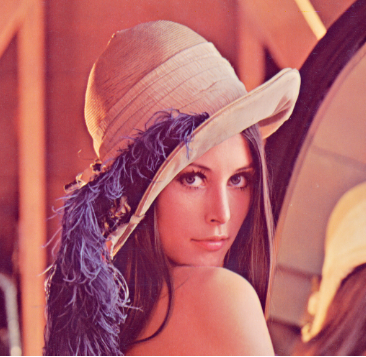

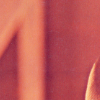

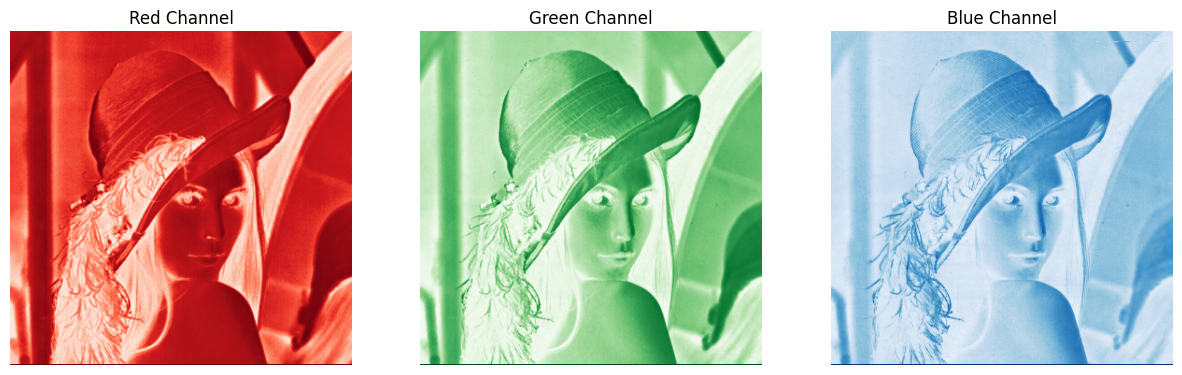

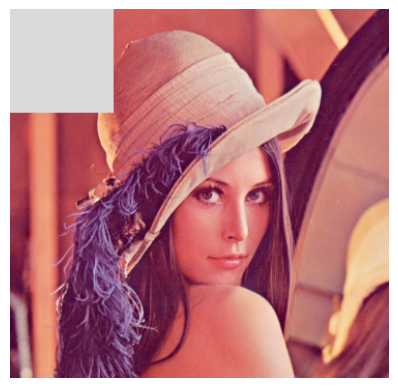

In [85]:
import numpy as np
import matplotlib.pyplot as plt

lenna_image = Image.open("lenna_image.png")

display(lenna_image)

image_np = image_np = np.array(lenna_image)

left = 0
upper = 0
right = 100
lower = 100
cropped_image = lenna_image . crop (( left , upper , right , lower ) )
display(cropped_image )

# Extract the three color channels (R, G, B)
red_channel = image_np[:, :, 0]  # Red channel
green_channel = image_np[:, :, 1]  # Green channel
blue_channel = image_np[:, :, 2]  # Blue channel

# Display each channel
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(red_channel, cmap='Reds')
ax[0].set_title("Red Channel")
ax[0].axis('off')

ax[1].imshow(green_channel, cmap='Greens')
ax[1].set_title("Green Channel")
ax[1].axis('off')

ax[2].imshow(blue_channel, cmap='Blues')
ax[2].set_title("Blue Channel")
ax[2].axis('off')

plt.show()

image_np[:100, :100] = 210

# Display the modified image_np
plt.imshow(image_np, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()

# Question 2

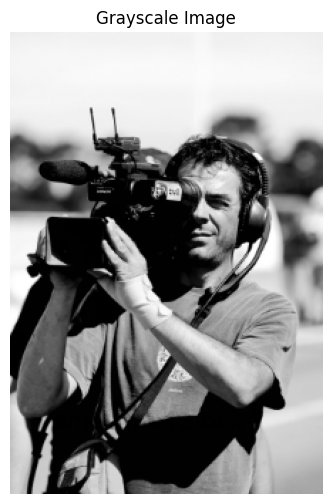

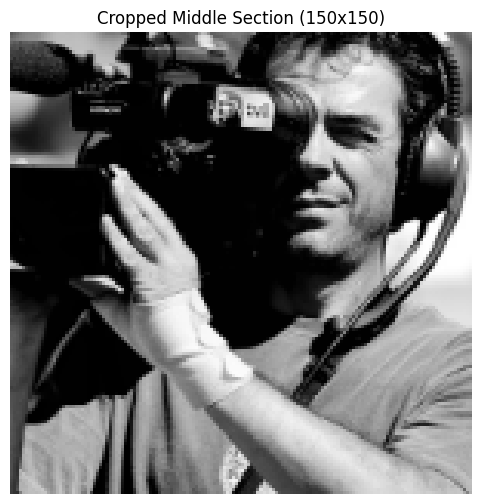

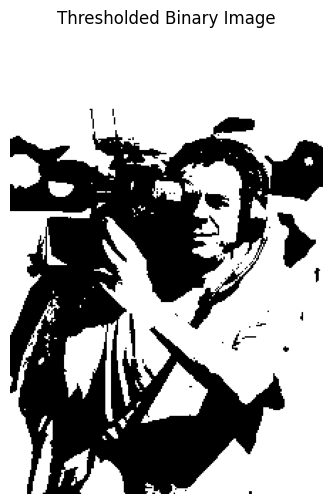

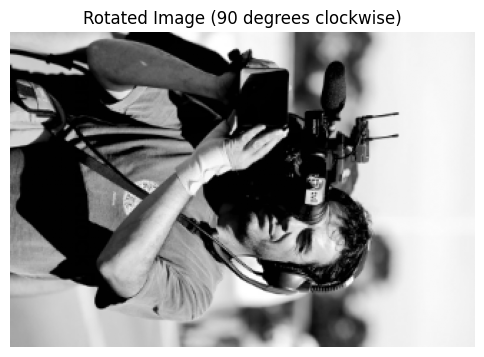

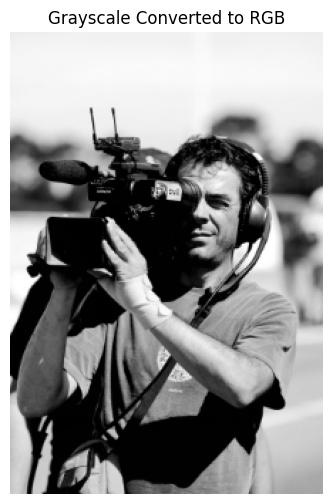

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 1. Load and display a grayscale image.
image_path = 'camera_man.jpg' 
grayscale_image = Image.open(image_path).convert('L')  # Convert to grayscale
grayscale_image_array = np.array(grayscale_image)

# Display the grayscale image using matplotlib
plt.figure(figsize=(6,6))
plt.imshow(grayscale_image_array, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# 2. Extract and display the middle section of the image (150 pixels).
height, width = grayscale_image_array.shape
center_x, center_y = width // 2, height // 2
cropped_image = grayscale_image_array[center_y - 75:center_y + 75, center_x - 75:center_x + 75] 

# Display the cropped image
plt.figure(figsize=(6,6))
plt.imshow(cropped_image, cmap='gray')
plt.title('Cropped Middle Section (150x150)')
plt.axis('off')
plt.show()

# 3. Apply a simple threshold to the image.
thresholded_image = np.where(grayscale_image_array < 100, 0, 255).astype(np.uint8)

# Display the resulting binary image
plt.figure(figsize=(6,6))
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Binary Image')
plt.axis('off')
plt.show()

# 4. Rotate the image 90 degrees clockwise and display the result.
rotated_image = grayscale_image.rotate(-90, expand=True) 

# Display the rotated image
plt.figure(figsize=(6,6))
plt.imshow(np.array(rotated_image), cmap='gray')
plt.title('Rotated Image (90 degrees clockwise)')
plt.axis('off')
plt.show()

# 5. Convert the grayscale image to an RGB image.
rgb_image = np.stack((grayscale_image_array,) * 3, axis=-1)  

# Display the converted RGB image
plt.figure(figsize=(6,6))
plt.imshow(rgb_image)
plt.title('Grayscale Converted to RGB')
plt.axis('off')
plt.show()


# Question 3

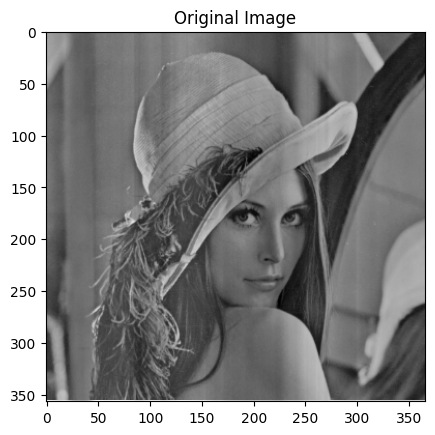

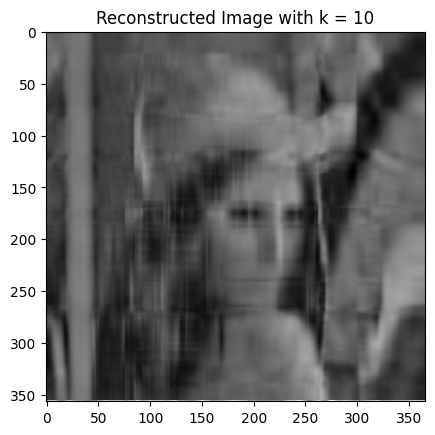

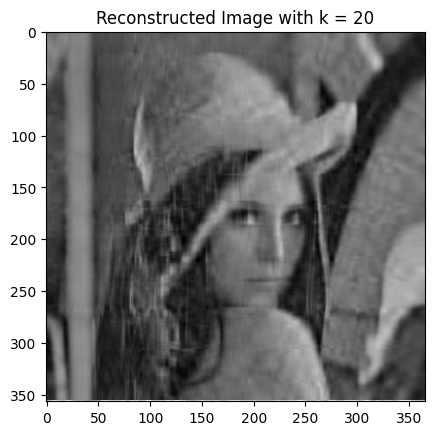

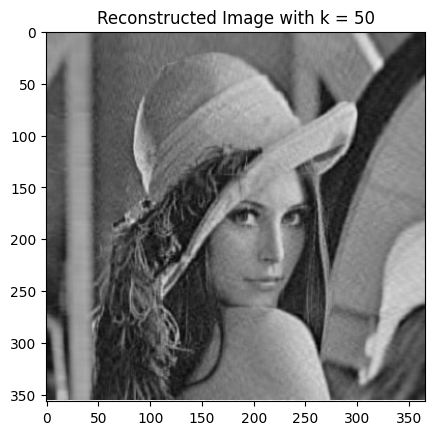

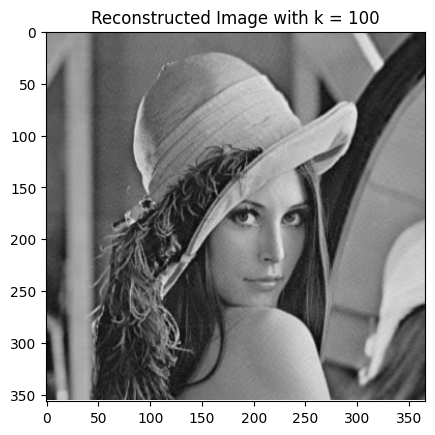

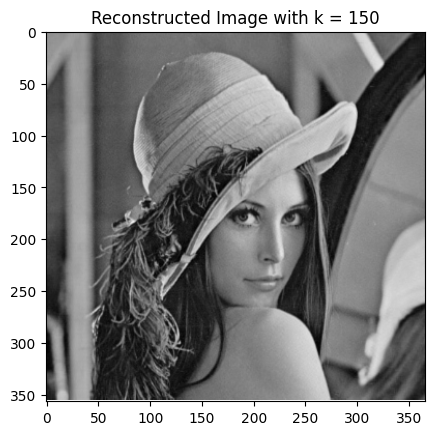

In [80]:
# Question 1: Load and Prepare Data
image_path = "lenna_image.png" 
img = Image.open(image_path).convert("L")  
img = np.array(img) / 255.0 

mean = np.mean(img, axis=0)
standardized_img = img - mean

plt.imshow(standardized_img, cmap='gray')
plt.title("Original Image")
plt.show()

# Question 2: Calculate the covariance matrix
cov_matrix = np.cov(standardized_img, rowvar=False)

# Question 3: Eigen Decomposition
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort eigenvalues and eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Question 4: Identify the Principal Components with the help of cumulative Sum plot
cumulative_variance = np.cumsum(eigenvalues) / np.sum(eigenvalues)
k_values = [10, 20, 50, 100, 150]  # Experiment with different numbers of components

# Question 5: Reconstruction and Experiment
for k in k_values:
    top_k_eigenvectors = eigenvectors[:, :k]
    reduced_data = standardized_img @ top_k_eigenvectors
    reconstructed_img = reduced_data @ top_k_eigenvectors.T + mean
    
    # Display Reconstructed Image
    plt.imshow(reconstructed_img, cmap='gray')
    plt.title(f"Reconstructed Image with k = {k}")
    plt.show()
